In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [292]:
data = pd.read_csv('automobile.csv')
df = data.copy()
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [293]:
# df = df.drop('symboling', axis = 1)
# df.head()

In [294]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [296]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [297]:

cat = df.select_dtypes(exclude = "number")
num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450




Categorical Date


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


In [298]:
#force drop int values in categorical columns to change to numerical
df['bore'] = pd.to_numeric(df['bore'], errors = 'coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors = 'coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors = 'coerce')

In [299]:

cat = df.select_dtypes(exclude = "number")
num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450




Categorical Date


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [300]:
for i in df.columns:
    if ((df[i].isnull().sum() / len(df)) * 100) < 30:
        if df[i].dtypes != 'O':
            df[i].fillna(df[i].median(), inplace = True)
        else:
            df[i].fillna(df[i].mode()[0], inplace = True)
    else:
        df.drop(i, axis = 1, inplace = True)

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [301]:
columns_to_scale = []
for i in num.columns:
    if df[i].describe()[2] > 1500:
        columns_to_scale.append(i)

columns_to_scale

['price']

In [302]:
from sklearn.preprocessing import LabelEncoder

encoded = {}  
for i in cat.columns: 
    encode = LabelEncoder() 
    df[i] = encode.fit_transform(df[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i +'_encoder'] = encode

encoded

{'make_encoder': LabelEncoder(),
 'fuel-type_encoder': LabelEncoder(),
 'aspiration_encoder': LabelEncoder(),
 'num-of-doors_encoder': LabelEncoder(),
 'body-style_encoder': LabelEncoder(),
 'drive-wheels_encoder': LabelEncoder(),
 'engine-location_encoder': LabelEncoder(),
 'engine-type_encoder': LabelEncoder(),
 'num-of-cylinders_encoder': LabelEncoder(),
 'fuel-system_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

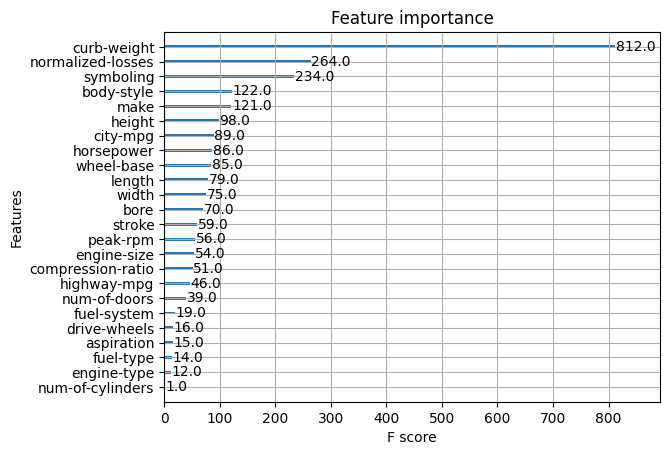

In [303]:
import xgboost as xgb
model = xgb.XGBRegressor()


x = df.drop('price', axis = 1)
y = df.price

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [304]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [305]:
sel_cols = ['curb-weight', 'normalized-losses', 'symboling', 'body-style', 'make', 'height',
            'city-mpg', 'horsepower', 'price']

df = df[sel_cols]
df.head()

,curb-weight,normalized-losses,symboling,body-style,make,height,city-mpg,horsepower,price
0,2548,115.0,3,0,0,48.8,21,111.0,13495
1,2548,115.0,3,0,0,48.8,21,111.0,16500
2,2823,115.0,1,2,0,52.4,19,154.0,16500
3,2337,164.0,2,3,1,54.3,24,102.0,13950
4,2824,164.0,2,3,1,54.3,18,115.0,17450


In [306]:
#create new x and y based on new dataset from sel_cols
from sklearn.model_selection import train_test_split

x = df.drop('price', axis = 1)
y = df['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (161, 8)
Xtest: (41, 8)
Ytrain: (161,)
Ytest: (41,)


In [307]:
# training_data = pd.concat([xtrain, ytrain], axis = 1)
# plt.figure(figsize = (7,3))

# display(training_data)
# sns.countplot(x = training_data['price'])


In [308]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor()

xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [309]:
cross_validate = xgb.predict(xtrain)
score = r2_score(cross_validate, ytrain).round(2) * 100
if score < 70:
    print(f'The Model is Underfitting as the score is: {score}%')
else:
    print(f'The Model Score {score}% is good')

The Model Score 100.0% is good


In [310]:
test_pred =  xgb.predict(xtest)
test_score = r2_score(test_pred, ytest).round(2) * 100
if score - test_score > 20:
    print(f'The Model is Overfitting as the score is: {test_score}%')
else:
    print(f'The Model Score {test_score}% is Optimal')

The Model Score 89.0% is Optimal


In [311]:
model = joblib.dump(xgb, open('AutomobileModel.pkl','wb'))

In [312]:
xtrain

,curb-weight,normalized-losses,symboling,body-style,make,height,city-mpg,horsepower
190,2912,103.0,-2,3,21,56.2,23,114.0
92,2028,128.0,1,2,12,53.3,31,69.0
39,2372,85.0,0,3,5,54.1,27,86.0
81,2926,115.0,3,2,11,50.2,19,145.0
112,3075,161.0,0,3,13,56.7,19,97.0
...,...,...,...,...,...,...,...,...
67,3770,93.0,-1,3,9,56.3,22,123.0
159,2169,168.0,1,3,19,52.6,29,70.0
114,3130,161.0,0,3,13,56.0,18,142.0
157,2122,91.0,0,2,19,52.8,28,70.0
